<a href="https://colab.research.google.com/github/Crowbar97/RejectionSampling/blob/master/RejectionSampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.special import gamma
from scipy import optimize, integrate
from operator import add
from math import sqrt, pi, exp, log2
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
pylab.rcParams.update(params)

In [0]:
class Distribs:
    @staticmethod
    def normal_density(mean, variance, x):
        return 1 / sqrt(2 * pi * variance ** 2) * exp(- (x - mean) ** 2 / (2 * variance ** 2))

    @staticmethod
    def get_normal_points(mean, variance, count):
        return np.random.normal(mean, variance, int(count))

    @staticmethod
    def uniform_density(left_bound, right_bound, x):
        if left_bound <= x <= right_bound:
            return 1 / (right_bound - left_bound)
        return 0

    @staticmethod
    def get_uniform_points(left_bound, right_bound, count):
        return np.random.uniform(left_bound, right_bound, int(count))

    @staticmethod
    def some_density(mu, x):
      return 1 / (2 * sqrt(2 * pi)) * (exp(-(x - mu) ** 2 / 2) + exp(-(x + mu) ** 2 / 2))

In [0]:
class Plotter:
    @staticmethod
    def plot(funs, bounds):
        left_bound, right_bound, step = bounds
        x = np.arange(left_bound, right_bound, step)
        
        plt.figure()
        colors = ['g', 'b', 'r']
        for i in range(len(funs)):
            y = list(map(funs[i], x))
            plt.plot(x, y, colors[i % len(colors)] + 'o-', label="y")

        plt.xlabel("x", fontsize=20)
        plt.ylabel("y", fontsize=20)
        plt.grid(True)
        plt.legend(loc=0, fontsize=20)

        plt.show()
        pass

    @staticmethod
    def plot_by_points(x, y):
        plt.figure()

        plt.plot(x, y, 'go-', label="y")

        plt.xlabel("x", fontsize=20)
        plt.ylabel("density", fontsize=20)
        plt.grid(True)
        plt.legend(loc=0, fontsize=20)

        plt.show()
        pass

In [0]:
class Sampler:
    @staticmethod
    def rej_sample(unk_dens,
                   kn_dens_sampler, cov_kn_dens,
                   point_count):
      
        ys = []

        iter_count = 0
        while len(ys) != point_count:
            x = kn_dens_sampler(1)[0]
            # print("x:", x)
            u = Distribs.get_uniform_points(0, cov_kn_dens(x), 1)[0]
            # print("u", u)
            # print("p(x) =", unk_dens(x))
            if u <= unk_dens(x):
                ys.append(x)
                # print("added!")
            iter_count += 1

        print("iteration count = %d" % iter_count)

        return ys


In [0]:
some_density = lambda x: Distribs.some_density(1.8, x)

### Nomal covering

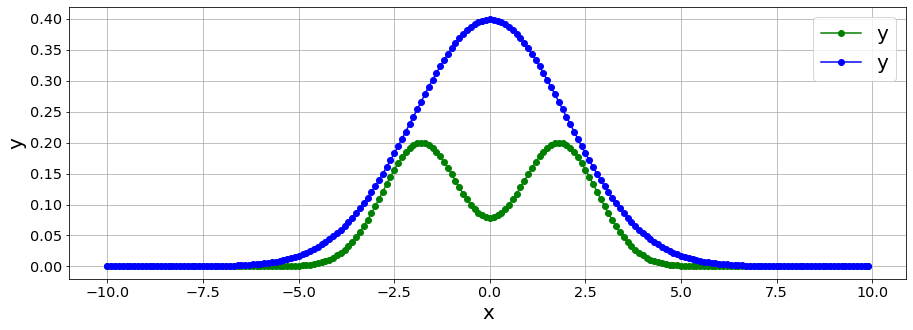

In [7]:
normal_sampler = lambda count: Distribs.get_normal_points(0, 2, count)
covering_normal_density = lambda x: 2 * Distribs.normal_density(0, 2, x)

Plotter.plot([some_density, covering_normal_density], (-10, 10, 0.1))

In [8]:
some_points = Sampler.rej_sample(some_density,
                                 normal_sampler, covering_normal_density,
                                 1e5)

iteration count = 199739


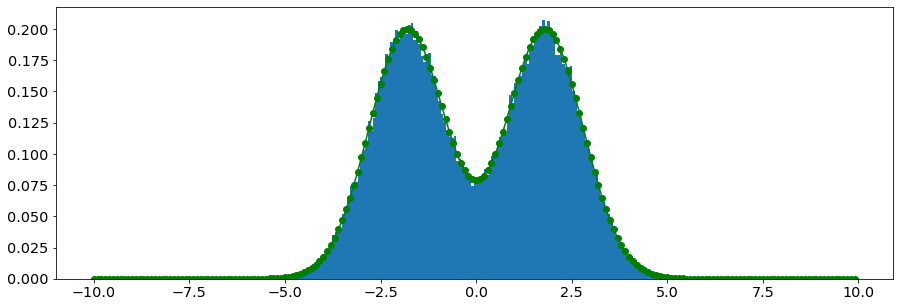

In [9]:
linspace = np.arange(-10, 10, 0.1)

plt.plot(linspace,
         np.array(list(map(some_density, linspace))),
         'go-', label="y")

plt.hist(some_points, bins=200, density=True)

plt.show()

### Uniform covering

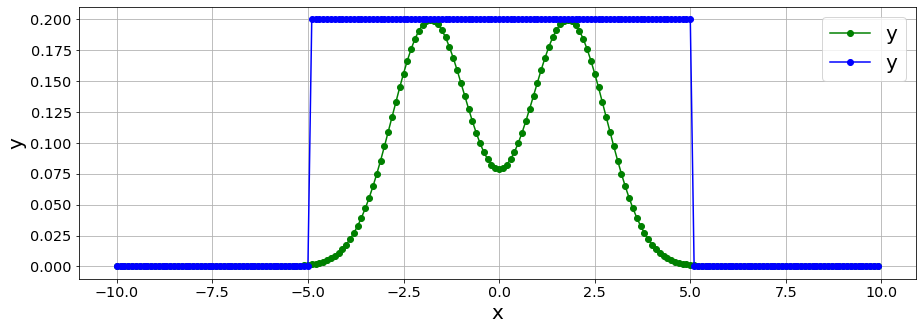

In [10]:
uniform_sampler = lambda count: Distribs.get_uniform_points(-5, 5, count)
covering_uniform_density = lambda x: 2 * Distribs.uniform_density(-5, 5, x)

Plotter.plot([some_density, covering_uniform_density], (-10, 10, 0.1))

In [11]:
some_points = Sampler.rej_sample(some_density,
                                 uniform_sampler, covering_uniform_density,
                                 1e5)

iteration count = 200423


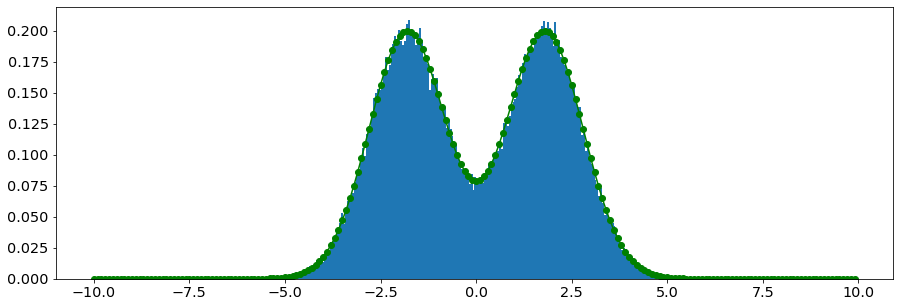

In [12]:
linspace = np.arange(-10, 10, 0.1)

plt.plot(linspace,
         np.array(list(map(some_density, linspace))),
         'go-', label="y")

plt.hist(some_points, bins=200, density=True)

plt.show()